In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("./du lieu cung cap/machine.data.txt", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
0    209 non-null object
1    209 non-null object
2    209 non-null int64
3    209 non-null int64
4    209 non-null int64
5    209 non-null int64
6    209 non-null int64
7    209 non-null int64
8    209 non-null int64
9    209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
data.describe()

,2,3,4,5,6,7,8,9
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


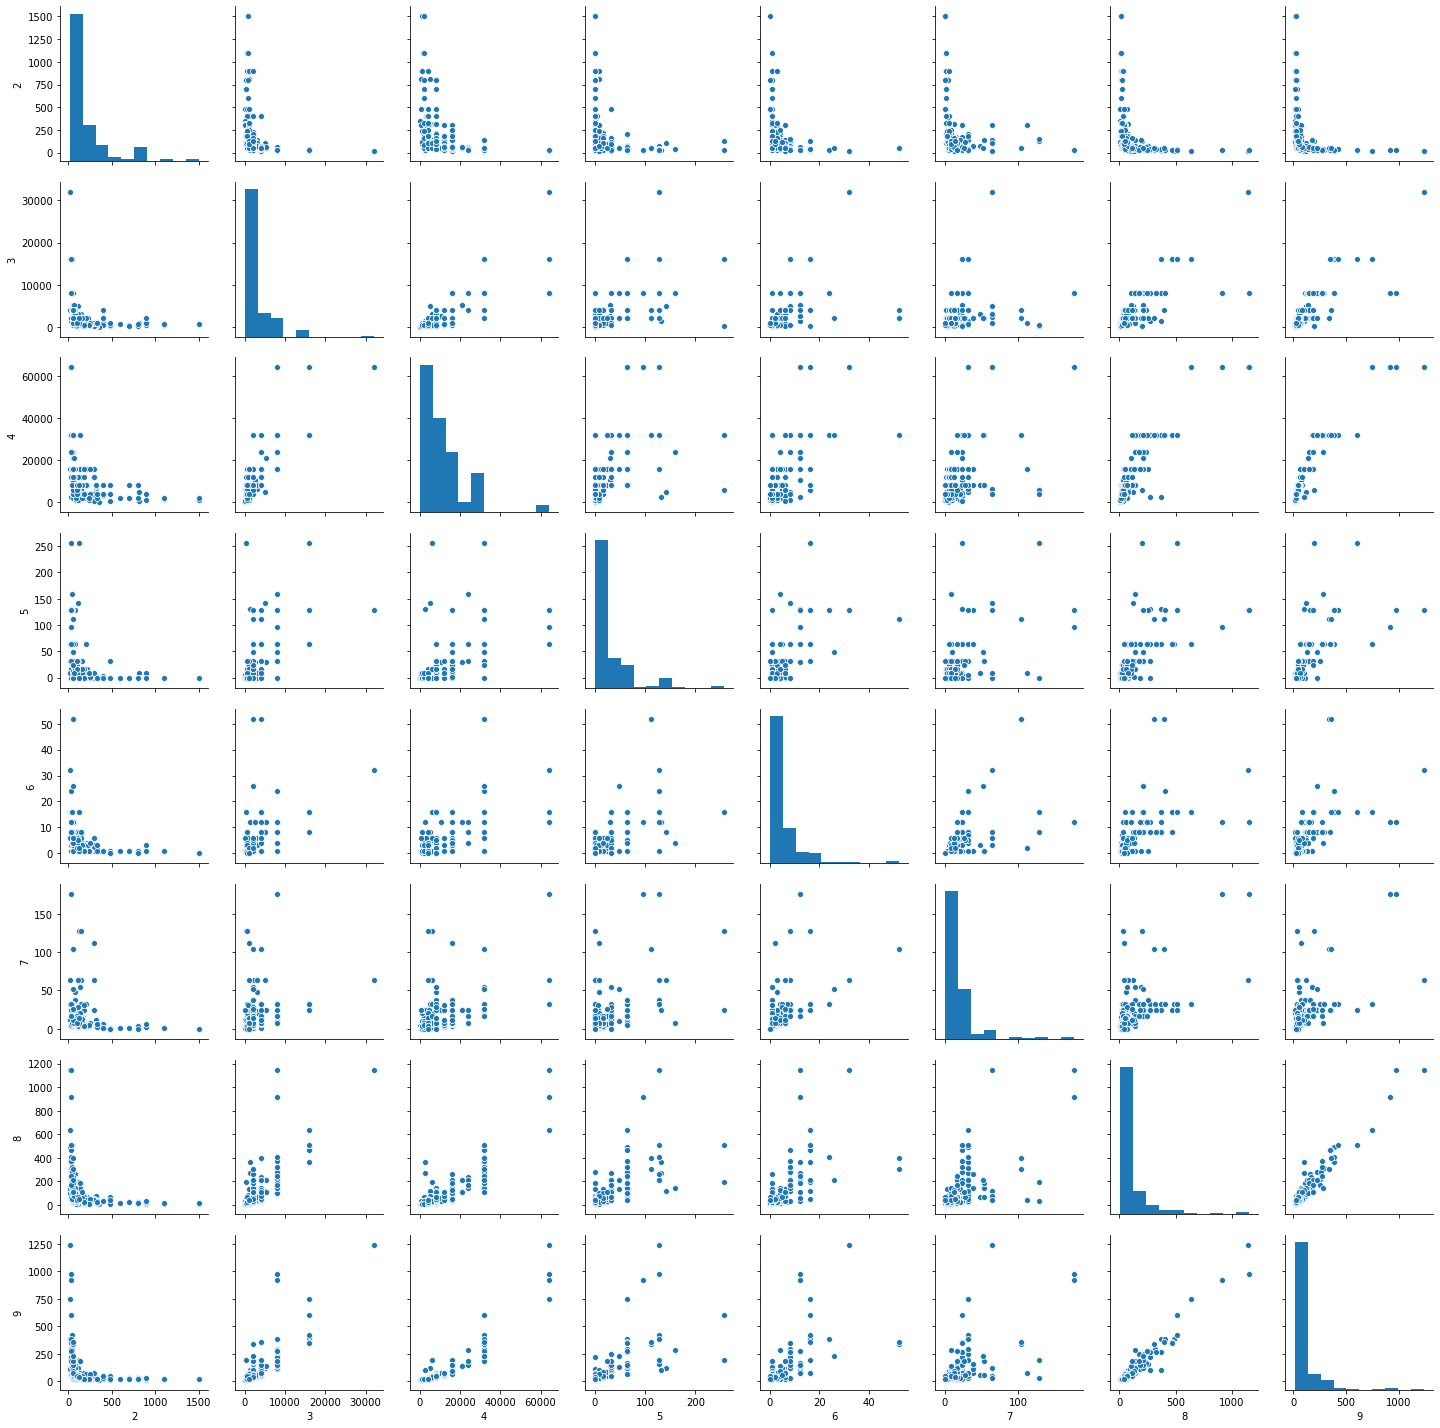

In [ ]:
sns.pairplot(data.iloc[:,2:10])
plt.show()

Features 3,4,5,6,7,8 shows a linear relationship to result 9, in which the linear relationship is the most obvious relationship. However, according to the data information, feature 8 seems to be another format of the results. So we could exclude it from the selected features for prediction.

In [ ]:
data.iloc[:,1].unique()

array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780'

In [ ]:
data.iloc[:,0].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [ ]:
df_corr = data.iloc[:,2:10].corr()

In [ ]:
df_corr

,2,3,4,5,6,7,8,9
2,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
3,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
4,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
5,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
6,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
7,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
8,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
9,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


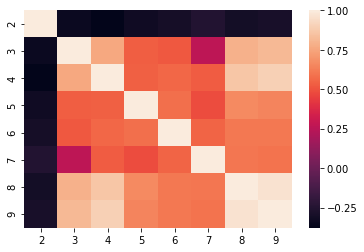

In [ ]:
sns.heatmap(df_corr)
plt.show()

Since the attributes have a somewhat linear relationship to the estimated relative performance, Linear Regression algorithm is chosen to build a prediction model for this data

## Simple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lr = LinearRegression()

Select all features 

In [ ]:
inputs = data.iloc[:,2:8]
outputs = data[[9]]

In [ ]:
inputs.head()

,2,3,4,5,6,7
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [ ]:
outputs.head()

,9
0,199
1,253
2,253
3,253
4,132


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("The R^2 score is: ", r2_score(y_test,y_pred))

The R^2 score is:  0.8792135836252107


In [ ]:
print("The train score is: ", lr.score(X_train,y_train))
print("The test score is: ", lr.score(X_test,y_test))

The train score is:  0.9126757578636553
The test score is:  0.8792135836252107


In [ ]:
print("The mean squared error: ", mean_squared_error(y_test,y_pred))

The mean squared error:  6493.110455001735


#### Select the 3 most correlated features

In [ ]:
X = data[[3,4,7]]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, outputs, test_size=0.2, random_state=42)

In [ ]:
lr1 = LinearRegression()

In [ ]:
lr1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_score(y_test1, lr1.predict(X_test1))

0.8847936070018562

In [ ]:
lr1.score(X_train1,y_train1)

0.881158280164705

In [ ]:
lr1.score(X_test1, y_test1)

0.8847936070018562

In [ ]:
mean_squared_error(y_test1, lr1.predict(X_test1))

6193.145366099461

#### Select 4 features

In [ ]:
X2 = data[[3,4,5,6]]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, outputs, test_size=0.2, random_state=42)

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_score(y_test2, lr2.predict(X_test2))

0.8353275746081544

In [ ]:
lr2.score(X_train2,y_train2)

0.8886359743435372

In [ ]:
mean_squared_error(y_test2,lr2.predict(X_test2))

8852.288850465955

#### Select another 4 features

In [ ]:
X3 = data[[3,4,6,7]]

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, outputs, test_size=0.2, random_state=42)

In [ ]:
lr3 = LinearRegression()

In [ ]:
lr3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_score(y_test3, lr3.predict(X_test3))

0.8836444961939838

In [ ]:
lr3.score(X_train3,y_train3)

0.8819872259117604

In [ ]:
mean_squared_error(y_test3,lr3.predict(X_test3))

6254.918068895779

#### Select another 4 features, include feature 2

In [ ]:
X4 = data[[2,3,4,5]]

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, outputs, test_size=0.2, random_state=42)

In [ ]:
lr4 = LinearRegression()

In [ ]:
lr4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_score(y_test4, lr4.predict(X_test4))

0.8449643930751394

In [ ]:
lr4.score(X_train4,y_train4)

0.8949879676129912

In [ ]:
mean_squared_error(y_test4,lr4.predict(X_test4))

8334.242793475772

#### Remark

When plugging all the features into Linear Regression model, the score fit 88% to the whole dataset with no overfitting.

When selecting features, from 3 to 4, the model remains suitable for the whole dataset with score > 80% with no over fitting.
--> Result is best predicted with all the feature from 2 to 7.

--> Can we bring the score higher? : increase the degree of variable.

## Multivariate Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
X1_pr = pr.fit_transform(inputs)

In [ ]:
inputs.shape, X1_pr.shape

((209, 6), (209, 28))

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_pr, outputs, test_size=0.2, random_state=42)

In [ ]:
lm1 = LinearRegression()

In [ ]:
lm1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
a1 = lm1.intercept_

In [ ]:
b1 = lm1.coef_

In [ ]:
a1, b1

(array([721683.25046784]),
 array([[-7.21664371e+05,  7.60955210e-04,  2.14083242e-04,
          1.95966456e-03,  2.70971024e-01,  6.24106453e-01,
         -4.29009970e-01, -1.61431741e-07, -1.68527091e-06,
         -6.88077079e-07, -1.16070864e-03, -9.59973825e-04,
          3.33874140e-04,  5.53805509e-08,  2.12276735e-07,
         -1.72608342e-05, -5.61484517e-05,  1.35894298e-04,
          4.14397019e-08,  2.11962697e-05,  2.83831786e-05,
          1.43016665e-05,  1.67165905e-03,  5.67573903e-03,
         -1.18157996e-03,  1.40571424e-02, -2.24799384e-02,
          3.21510227e-03]]))

In [ ]:
y1_pred = lm1.predict(X1_test)

In [ ]:
print("The train score is: ", lm1.score(X1_train,y1_train))
print("The test score is: ", lm1.score(X1_test,y1_test))

The train score is:  0.9990617469150969
The test score is:  0.9977641527334885


In [ ]:
print("The mean squared error is: ", mean_squared_error(y1_test,y1_pred))

The mean squared error is:  120.19235024678343


#### Remark:

After increasing the degree of variables to 2, the model achieves the score almost 100% for both train and test set, while the error is much smaller than when using Simple Linear Regression. 

This means that the Multivariate Polynomimal is a better model for the dataset, although it raises the number of columns from 6 to 28.